<div style="padding: 10px 20px; background-color: #FFFFFF; text-align: center;">
    <img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" 
         width=400 
         style="margin: 5px auto !important;">
    <h1 align=center>Hacktiv8 PTP Introduction to Data Science Projects 1</h1>
    <h3 align=center>Analisis Kriminalitas Wilayah Administrasi London Raya (Januari 2008 s/d Desember 2016)</h3>
</div>

## Pendahuluan

### Deskripsi Permasalahan

Wilayah administrasi London Raya terdiri dari 33 sektor (borough), dimana setiap sektor memiliki pemerintahannya sendiri. Tujuan dari analisis ini adalah untuk mengetahui tindak kriminalitas yang terjadi di Wilayah administrasi London Raya dan setiap sektornya pada rentang bulan Januari 2008 hingga Desember 2016. Dataset yang menjadi dasar analisis memiliki beberapa atribut data yaitu sebagai berikut:

* `lsoa_code`: kode area administrasi dan demografis
* `borough`: sektor dari Wilayah administrasi London Raya
* `major_category`: kategori kriminalitas mayor
* `minor_category`: kategori kriminalitas minor
* `value`: jumlah kejadian tindak kriminalitas sesuai dengan sektor dan waktu (bulan dan tahun)
* `year`: tahun pendataan
* `month`: bulan pendataan

Analisis yang dilakukan didasarkan oleh data dan memiliki tujuan utama untuk menurunkan beberapa kesimpulan yang terlihat dari data keseluruhan dan juga melihat pola atau kejadian menarik yang teramati dalam data,

## Data Overview

### Import Pustaka

In [1]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

### Persiapan Data

In [121]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

### Preprocessing

#### Cuplikan Data

In [122]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### Cek Missing Values

In [5]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Tidak ditemukan missing values pada dataset

#### Eksplorasi dan Pengenalan Tiap Kolom

In [6]:
for column in df.columns:
    unique_value = df[column].unique()
    unique_value_percentage = len(unique_value)*100/df.shape[0]
    
    print(column)
    print("=> Amount unique values \t: ", len(unique_value))
    print("=> Percentage unique values \t: ", "< 0.1 %"  if unique_value_percentage < 0.1 else "{:.2f}".format(unique_value_percentage))
    print("=> Overview values")
    print(unique_value[:5])
    print()

lsoa_code
=> Amount unique values 	:  4835
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['E01001116' 'E01001646' 'E01000677' 'E01003774' 'E01004563']

borough
=> Amount unique values 	:  33
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth']

major_category
=> Amount unique values 	:  9
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage']

minor_category
=> Amount unique values 	:  32
=> Percentage unique values 	:  < 0.1 %
=> Overview values
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon']

value
=> Amount unique values 	:  247
=> Percentage unique values 	:  < 0.1 %
=> Overview values
[0 1 2 3 4]

year
=> Amount unique values 	:  9
=> Percentage unique values 	:  < 0.1 %
=> Overview values
[2016 2015 2008 2012 2010]

month
=> Amount unique values 	:  12
=

Berdasarkan informasi di atas, ditemukan bahwa pada data tidak terdapat missing values ataupun values yang mencurigakan. Dapat dilihat juga bahwa values dari setiap atribut terbatas variasinya.

#### Penambahan Kolom Turunan

In [7]:
df['periode'] = df.apply(lambda row: str(row.year) + "-" + (str(row.month) if row.month >= 10 else "0" + str(row.month)), axis = 1)

In [8]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month,periode
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11,2016-11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11,2016-11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5,2015-05
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3,2016-03
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6,2008-06
...,...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2,2015-02
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6,2015-06
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2,2011-02
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5,2011-05


#### Pengurangan Ukuran Data Vertikal
Dikarenakan jumlah data yang mencapai 13,5 juta baris, diperlukan waktu yang cukup lama untuk melakukan pemrosesan dan visualisasi. Setelah melihat overview data, diamati bahwa salah satu elemen yang membuat jumlah data membengkak adalah detail informasi lsoa_code. Terdapat 4835 lsoa_code yang tersebar dalam 33 borough, artinya rata-rata setiap borough memiliki 147 lsoa_code. Untuk itu, dibuat dataframe baru yang melakukan agregasi detail wilayah hingga tingkat borough. Perubahan ini dapat mereduksi jumlah data menjadi kurang dari 1% dari sebelumnya.

In [9]:
df_reduced = df.groupby(['borough', 'major_category', 'minor_category', 'year', 'month', 'periode'])[['value']].sum().reset_index() 

In [10]:
df_reduced

,borough,major_category,minor_category,year,month,periode,value
0,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,1,2008-01,55
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,2,2008-02,65
2,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,3,2008-03,55
3,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,4,2008-04,53
4,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,5,2008-05,55
...,...,...,...,...,...,...,...
112963,Westminster,Violence Against the Person,Wounding/GBH,2016,8,2016-08,99
112964,Westminster,Violence Against the Person,Wounding/GBH,2016,9,2016-09,105
112965,Westminster,Violence Against the Person,Wounding/GBH,2016,10,2016-10,105
112966,Westminster,Violence Against the Person,Wounding/GBH,2016,11,2016-11,96


Reduksi baris berhasil menurunkan jumlah baris menjadi 113 ribu, sehingga kurang dari 1% dibanding data detail.  

#### Nilai Unique Fitur

In [219]:
list_borough = df['borough'].unique()
list_major_category = df['major_category'].unique()
list_minor_category = df['minor_category'].unique()
list_year = df['year'].unique()
list_month = df['month'].unique()
list_periode = df_reduced['periode'].unique()

## Exploratory Data Analysis

### Preparing Visualization Tools

In [220]:
%matplotlib inline 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [221]:
mpl.style.use(['ggplot'])

In [222]:
df_reduced

,borough,major_category,minor_category,year,month,periode,value
0,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,1,2008-01,55
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,2,2008-02,65
2,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,3,2008-03,55
3,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,4,2008-04,53
4,Barking and Dagenham,Burglary,Burglary in Other Buildings,2008,5,2008-05,55
...,...,...,...,...,...,...,...
112963,Westminster,Violence Against the Person,Wounding/GBH,2016,8,2016-08,99
112964,Westminster,Violence Against the Person,Wounding/GBH,2016,9,2016-09,105
112965,Westminster,Violence Against the Person,Wounding/GBH,2016,10,2016-10,105
112966,Westminster,Violence Against the Person,Wounding/GBH,2016,11,2016-11,96


### Trend Jumlah Kriminalitas Tahunan Se-Wilayah Administrasi London

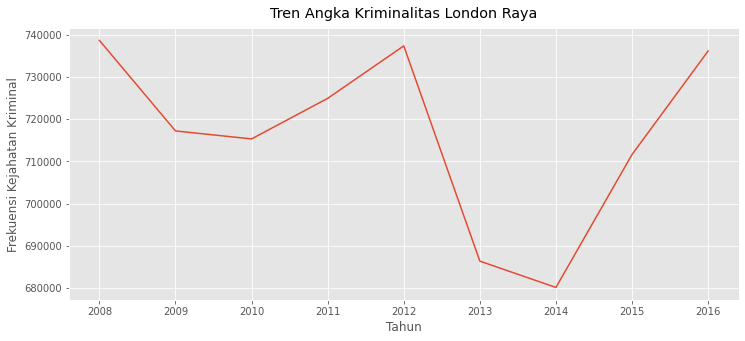

In [223]:
plt.figure(figsize=(12, 5))

df_reduced.groupby(['year'])['value'].sum().plot(kind='line')

plt.title('Tren Angka Kriminalitas London Raya', pad=10)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa banyaknya tindakan kriminal yang terjadi di London Raya dari tahun ke tahun terbilang fluktuatif. Fluktiasi yang terjadi tidak terlalu besar secara presentase karena selama 9 tahun dari tahun 2008 sampai tahun 2016, angka kejadian kriminal terdapat pada rentang 680.000 hingga 740.000 kejadian. Namun, karena yang menjadi bahan analisis adalah tindak kriminalitas, penambahan dan pengurangan yang terjadi tetap sangat berarti.

Berdasarkan pengamatan terhadap kenaikan dan penurunan angka kejadian, sebenarnya teramati bahwa setiap dua tahun sekali, tren kejadian berubah.
- Pada tahun 2009 dan 2010, angka kejadian menurun, diawali penurunan tajam pada tahun 2009 dan diikuti penurunan landai pada tahun 2010. 
- Pada tahun 2011 dan 2012, angka kejadian naik dengan perubahan (kemiringan garis) yang cukup signifikan.
- Pada tahun 2013 dan 2014, angka kejadian menurun, diawali penurunan tajam pada tahun 2013 dan diikuti penurunan lebih landai pada tahun 2014. Hal ini mirip dengan pola pada tahun 2009 dan 2010.
- Pada tahun 2015 dan 2016, angka kejadian naik dengan perubahan (kemiringan garis) yang signifikan.

Namun pola yang diamati masih dalam rentang waktu yang sangat sedikit, oleh karena itu besar kemungkinan merupakan hal yang kebetulan. Diperlukan data yang lebih luas untuk lebih meyakinkan.

### Trend Jumlah Kriminalitas Tahunan Per Major Category Se-Wilayah Administrasi London

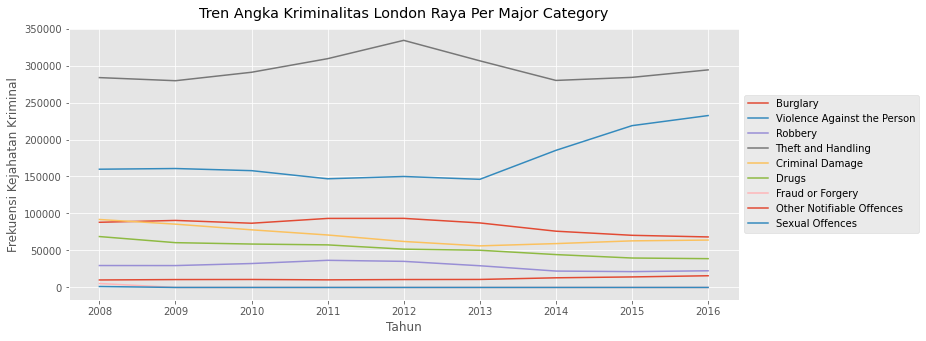

In [224]:
plt.figure(figsize=(12, 5))

for category in list_major_category:
    df_reduced[df_reduced['major_category'] == category].groupby(['year'])['value'].sum().plot(kind='line', legend=True)

plt.title('Tren Angka Kriminalitas London Raya Per Major Category', pad=10)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.legend(list_major_category, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

**Insight**

Kategori kriminal **Theft and Handling** selalu menjadi yang teratas setia tahunnya dan diikuti oleh **Violence Against Person**. Jika dilihat dari kasat mata fluktuasi tidak terlalu signifikan, namun terlihat mayoritas mengalami kenaikan pada tahun 2012. Kriminal **Theft and Handling** masih menjadi penyebab utama kenaikan pada tahun tersebut. Sejak tahun 2013, kriminal **Violence Against Person** selalu naik dan berperan besar dalam jumlah tindakan kriminal.

### Trend Jumlah Kriminalitas Bulanan Se-Wilayah Administrasi London

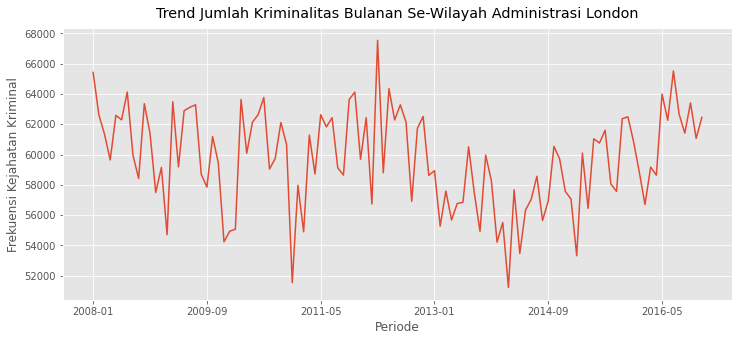

In [225]:
plt.figure(figsize=(12, 5))

df_reduced.sort_values(by=['periode']).groupby(['periode'])['value'].sum().plot(kind='line');

plt.title('Trend Jumlah Kriminalitas Bulanan Se-Wilayah Administrasi London', pad=10)
plt.xlabel('Periode')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa banyaknya tindakan kriminal yang terjadi di London Raya dari tiap periodenya termasuk cukup fluktuatif (dalam satuan terkecil bulan).Tercatat jumlah kejadian tertinggi dalam satu bulan mencapai hampir 68.000 kasus, sedangkan paling rendah sekitar 51.000 kasus. Dikarenakan fluktuasi yang cukup tinggi, tidak terlihat pola yang terdapat pada grafik tren jumlah kejadian ini.

### Trend Jumlah Kriminalitas Bulanan Per Major Category Se-Wilayah Administrasi London

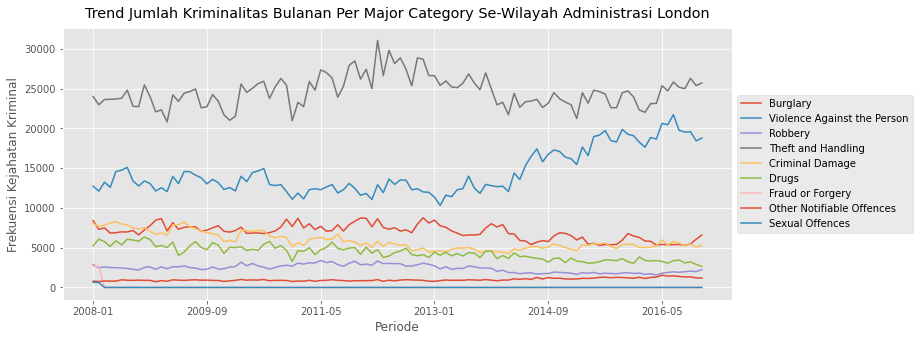

In [226]:
plt.figure(figsize=(12, 5))

for category in list_major_category:
    df_reduced[df_reduced['major_category'] == category].groupby(['periode'])['value'].sum().plot(kind='line', legend=True)

plt.title('Trend Jumlah Kriminalitas Bulanan Per Major Category Se-Wilayah Administrasi London', pad=10)
plt.xlabel('Periode')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.legend(list_major_category, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

**Insight**

Tidak didapatkan pola menarik selain yang dapat dilihat pada Trend Jumlah Kriminalitas Tahunan Per Major Category. 

### Proporsi Kumulatif Major Category

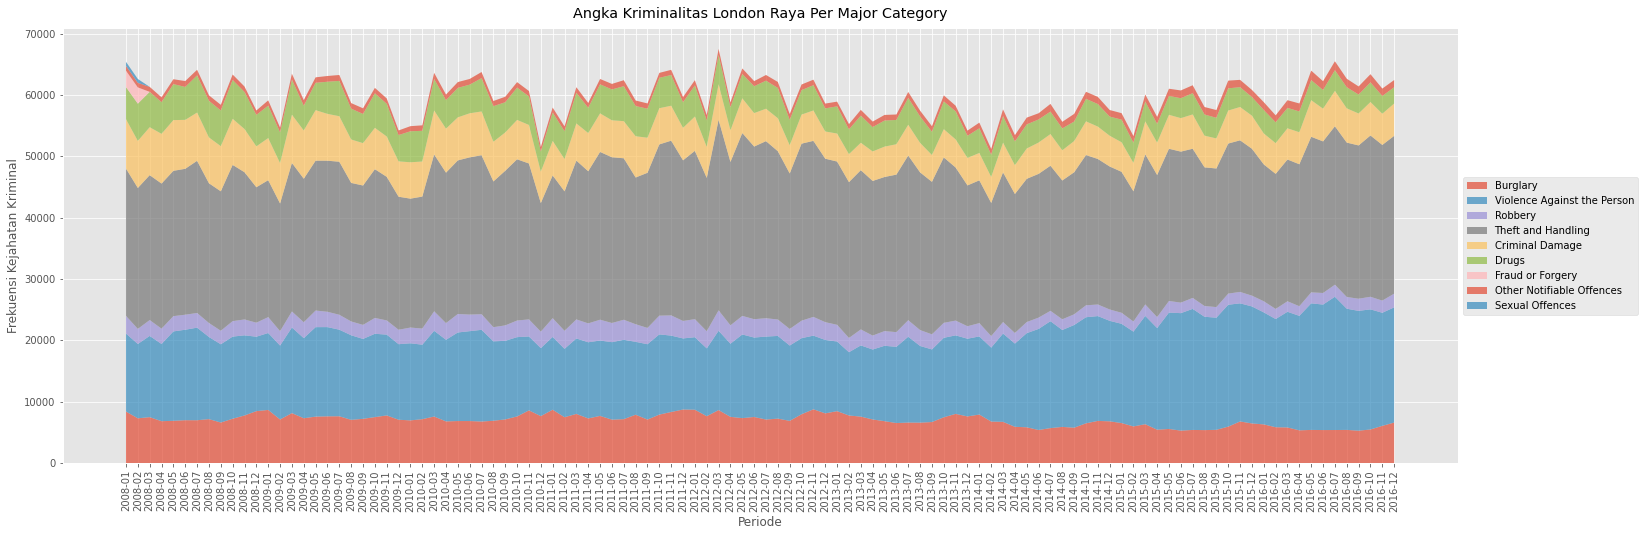

In [227]:
plt.figure(figsize=(25, 8))

values = []

for category in list_major_category:
    values.append(df_reduced[df_reduced['major_category'] == category].groupby(['periode'])['value'].sum().values)

plt.title('Angka Kriminalitas London Raya Per Major Category', pad=10)
plt.xlabel('Periode')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.stackplot(list_periode, values, alpha=0.7)
plt.xticks(rotation = 90)

plt.legend(list_major_category, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show();

**Insight**

Dengan menggunakan area chart, lebih terlihat lagi mengenai dominasi kriminal Theft and Handling serta Violence Against Person dalam 9 tahun terakhir dari 2016. Luas gabungan keduanya bahkan mengalahkan luas jumlah kategory lainnya.

### Distribusi Kriminalitas Berdasarkan Bulan Se-Wilayah Administrasi London
Untuk melihat apakah ada bulan tertentu yang menyebabkan tingkat kriminalitas secara umum naik yang mungkin dikarenakan ada event tahunan.

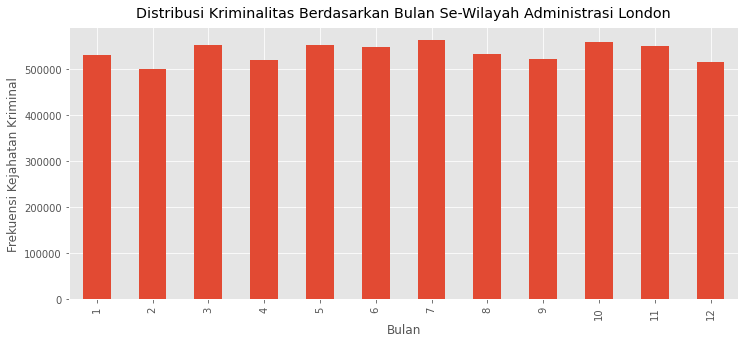

In [228]:
plt.figure(figsize=(12, 5))

df_reduced.groupby(['month'])['value'].sum().plot(kind='bar');

plt.title('Distribusi Kriminalitas Berdasarkan Bulan Se-Wilayah Administrasi London', pad=10)
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

**Insight**

Berdasarkan grafik tersebut, terlihat bahwa tidak terdapatnya perbedaan frekuesi kriminalitas yang signifikan sehingga apat dikatakan persebaran terlihat cukup seragam.

### Proporsi Major Category

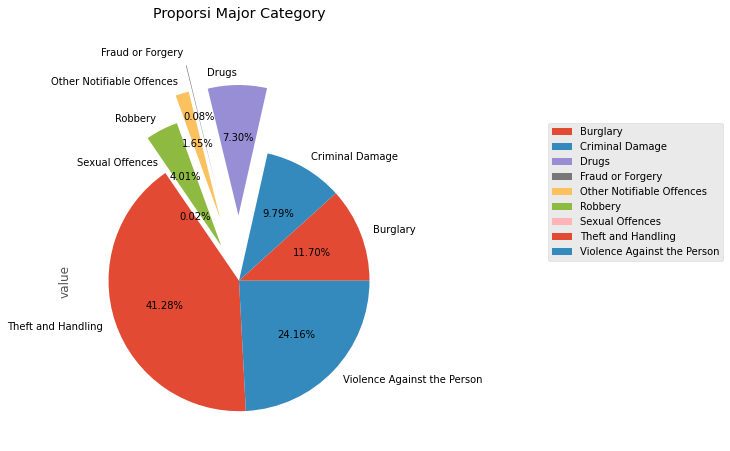

In [229]:
df_reduced.groupby(["major_category"])["value"].sum().plot(kind="pie", explode=(0.0, 0.0, 0.5, 0.7, 0.5, 0.3, 0.0, 0.0, 0.0), autopct="%.2f%%", legend=True, figsize=(25,6))

plt.title('Proporsi Major Category', pad=100)

plt.legend(bbox_to_anchor=(2.0, 1.0))
plt.show();

**Insight**

Berdasarkan diagram pie di atas, dapat disimpulkan bahwa dua kriminal terdominan berkontribusi sebesar 65.44% dari total kejadian kriminal di Wilayah London. Dan diketahui juga bahwa 87% dari total kejadian kriminal masuk dalam 4 kategori major dari 33 kategori major. Hal ini dapat menjadi bahan analisis lebih lanjut.

### Proporsi Minor Category Dari Major Category Dominan (Theft and Handling)

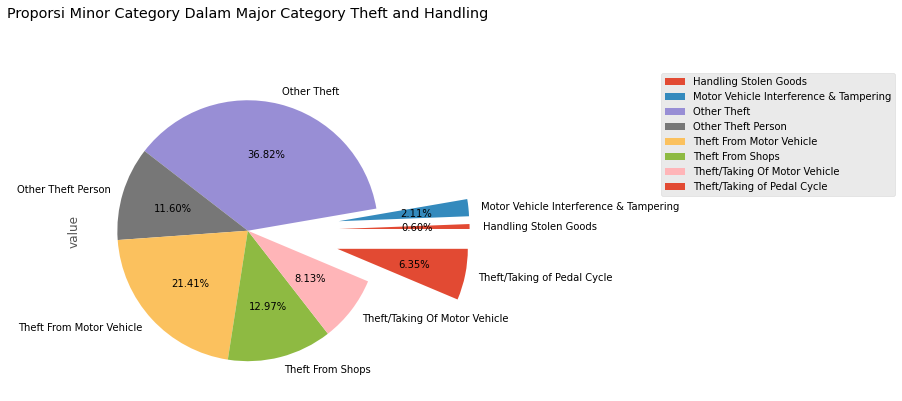

In [230]:
df_theft = df_reduced.groupby(['major_category', 'minor_category'])['value'].sum().reset_index()

df_theft = df_theft[df_theft['major_category'] == "Theft and Handling"].set_index('minor_category')['value']

df_theft.plot(kind="pie", explode=(0.7, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7), autopct="%.2f%%", legend=True, figsize=(25,6))

plt.title('Proporsi Minor Category Dalam Major Category Theft and Handling', pad=50)

plt.legend(bbox_to_anchor=(2.5, 1.0))
plt.show();

Terlihat bahwa jumlah 4 pencurian terbesar yang sudah terkategorisasi adalah pencurian kendaraan bermotor, pencurian toko, pencopetan, dan pembegalan. Dan proporsi keeempatnya lebih dari 50% dari total kejadia pencurian.

### Distribusi Deskriptif Jumlah Kejadian Kriminal Bulan Setiap Tahun

<Figure size 864x360 with 0 Axes>

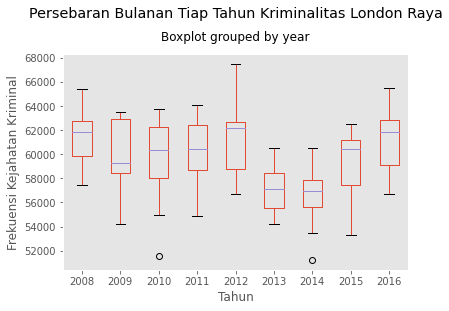

In [231]:
plt.figure(figsize=(12, 5))

df_reduced.groupby(['month', 'year'])[['value']].sum().reset_index().boxplot(by ='year', column=['value'], grid = False);

plt.title('Persebaran Bulanan Tiap Tahun Kriminalitas London Raya', pad=10, y=1.12)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

Berdasarkan Boxplot yang terbentuk, dapat dilihat beberapa statistik deskriptif mencakup nilai maksimum, minimum, kuartil, median. Terlihat bahwa median kejadian kriminal bulanan paling tinggi didaptkan pada tahun 2012 dan 2016. Nilai maksimum dan minimum pada tahun tersebut juga ikut naik walaupun pada tahun 2012 terlihat Q1 dan Q3 tampak tidak mengalami kenaikan signifikan.

Dari visualisasi tersebut, dapat disimpulkan juga tidak terdapat bulan pada periode kapan pun yang termasuk outlier.

### Histogram Jumlah LSOA Area Berdasarkan Jumlah Kriminalitas

<Figure size 864x360 with 0 Axes>

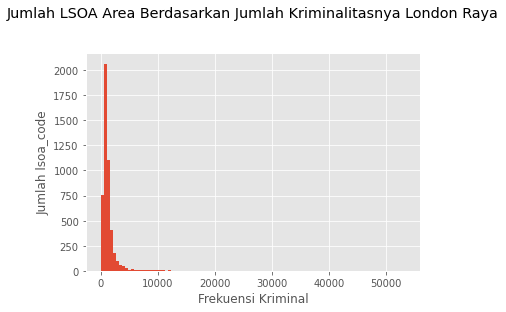

In [232]:
plt.figure(figsize=(12, 5))

df.groupby(['lsoa_code'])[['value']].sum().hist(bins=100);

plt.title('Jumlah LSOA Area Berdasarkan Jumlah Kriminalitasnya London Raya', pad=10, y=1.12);
plt.xlabel('Frekuensi Kriminal')
plt.ylabel('Jumlah lsoa_code')

plt.show();

Persebaran termasuk sangat condong ke kiri. Diperkirakan data cukup banyak pencilan, artinya terdapat lsoa_code yang memiliki jumlah kriminalitas dalam 9 tahun jauh diatas rata-rata atau nilai tengah. Kebanyakan lsoa_code memiliki jumlah kasus yang berada antara 1 sampai 5000. 

### Histogram Jumlah Borough Area Berdasarkan Jumlah Kriminalitas

<Figure size 864x360 with 0 Axes>

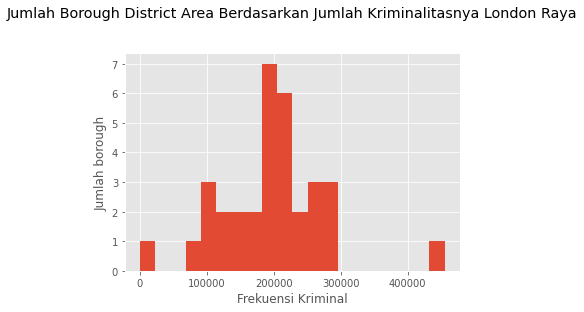

In [233]:
plt.figure(figsize=(12, 5));

df.groupby(['borough'])[['value']].sum().hist(bins=20)

plt.title('Jumlah Borough District Area Berdasarkan Jumlah Kriminalitasnya London Raya', pad=10, y=1.12);
plt.xlabel('Frekuensi Kriminal')
plt.ylabel('Jumlah borough')

plt.show();

Persebaran jumlah kasus antar borough masih cenderung lebih normal dan merata dibandingkan antar lsoa. Nilai tengah menjadi frekuensi terbanyak dan persebaran memusat ke tengah.

### Perbandingan Total Kasus Kriminal Berdasarkan Borough

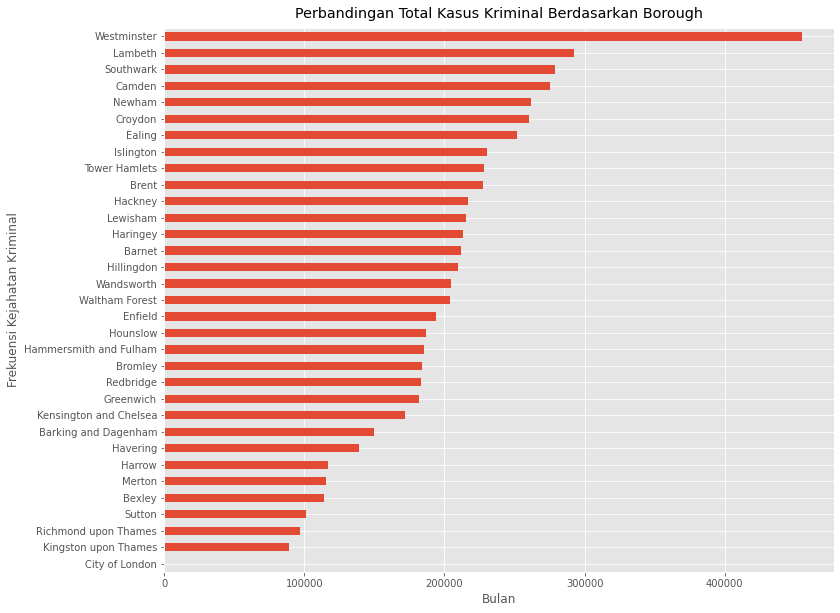

In [234]:
plt.figure(figsize=(12, 10))

df_reduced.groupby(['borough'])['value'].sum().sort_values(ascending=True).plot(kind='barh');

plt.title('Perbandingan Total Kasus Kriminal Berdasarkan Borough', pad=10)
plt.xlabel('Bulan')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

Borough **Westminster** menjadi area bagian yang paling banyak kasus kriminalitasnya. Dan **City of London** menjadi kota teraman dari kriminalitas karena jumlah kasus yang sangat sedikit. Jarak antar keduanya termasuk sangat jauh.

### 20 Besar Total Kasus Kriminal Berdasarkan LSOA Code

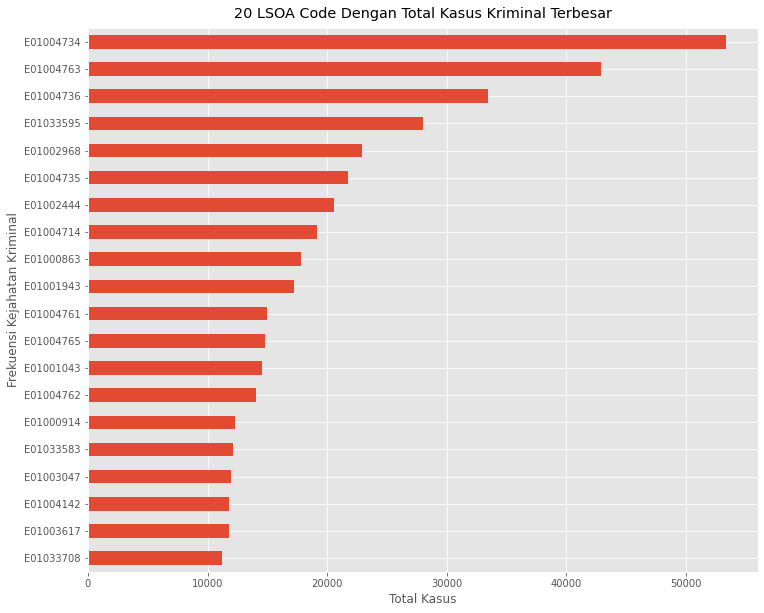

In [235]:
plt.figure(figsize=(12, 10))

df.groupby(['lsoa_code'])['value'].sum().sort_values(ascending=False)[:20][::-1].plot(kind='barh');

plt.title('20 LSOA Code Dengan Total Kasus Kriminal Terbesar', pad=10)
plt.xlabel('Total Kasus')
plt.ylabel('Frekuensi Kejahatan Kriminal')

plt.show();

Berdasarkan 20 lsoa dengan jumlah kriminalitas terbesar, perlu diperhatikan bahwa jumlah lsoa adalah 4835, dan dari 20 terbesarnya saja terlihat perbedaan yang sangat signifikan yaitu dari 50.000 ke 10.000. Inilah yang membuat tampilan pada histogram sebelumnya menjadi sangat condong ke kiri.

### Proporsi  Borough Berdasarkan Banyaknya LSOA Pada 20 LSOA Dengan Kasus Terbesar

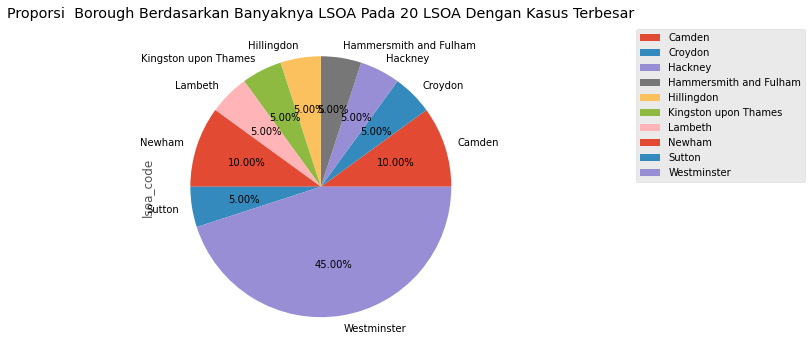

In [236]:
df.groupby(['lsoa_code', 'borough'])['value'].sum().sort_values(ascending=False)[:20].reset_index().groupby(["borough"])["lsoa_code"].count().plot(kind='pie', autopct="%.2f%%", legend=True, figsize=(25,6))

plt.legend(bbox_to_anchor=(2.0, 1.0))
plt.title("Proporsi  Borough Berdasarkan Banyaknya LSOA Pada 20 LSOA Dengan Kasus Terbesar")
plt.show()

Ingin diketahui kontribusi borough yang menyumbangkan lsoa area dengan kriminalitas tertinggi dengan melihat pie chart di atas. Ternyata borough Westminster masih menjadi yang sangat dominan karena menyumbangkan 9 lsoa dari 20 lsoa tertinggi. Hal ini tentunya sangat perlu menjadi perhatian.

## Kesimpulan

Berdasarkan analisis yang telah dilakukan ditemukan bahwa dalam beberapa tahun terakhir sejak 2016 jumlah kriminalitas cukup fluktuatif. Kriminalitas **Theft and Handling** serta **Violence People** menjadi kategori yang sangat dominan. Persebaran banyaknya kriminalitas juga kurang rata antar daerah, terlebih antar lsoa. Perbedaan signifikan terlihat antara borough dengan kriminalitas tertinggi dan terendah karena perbedaannya sangat signifikan. Dan diketahui daerah yang paling berkontribusi dalam angka kriminalitas adalah daerah **Westminster**.